<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) | [Contents](Index.ipynb) | [Visualizing Errors](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

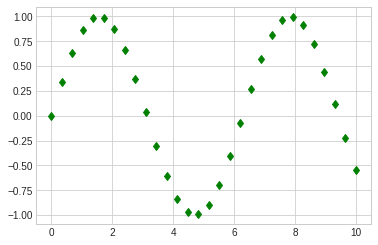

In [3]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

# 'o', means this is a scatter plot
# you can also try other markers: ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
# plt.plot(x, y, 'o', color='black');
plt.plot(x, y, 'd', color='g');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

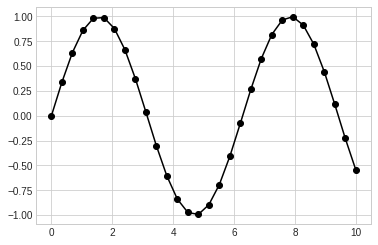

In [4]:
# Combine line chart and scatter plot
# Advantage: show data points
# o is marker, k is color
plt.plot(x, y, '-ok');
# plt.plot(x, y, '-+r');

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

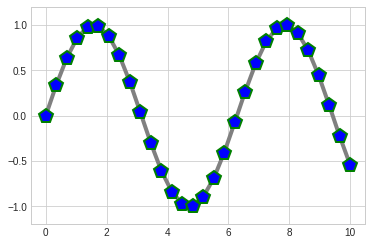

In [5]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='b',
         markeredgecolor='g',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

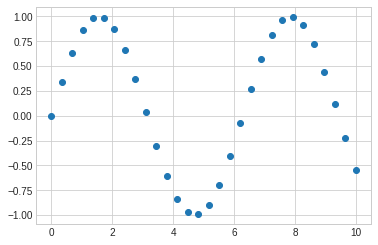

In [6]:
plt.scatter(x, y, marker='o');

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

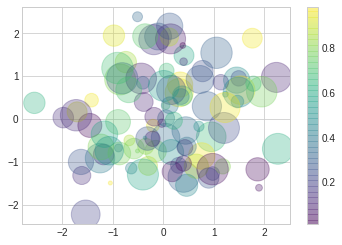

In [8]:
# initialize the seed 0
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

print(x, len(x))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
#           this is how you map your data with color, i.e., c=colors
            cmap='viridis')
plt.colorbar();  # show color scale

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

## ``plot`` Versus ``scatter``: A Note on Efficiency

Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

<!--NAVIGATION-->
< [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) | [Contents](Index.ipynb) | [Visualizing Errors](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
